<a href="https://colab.research.google.com/github/immy78/Deep_Learning/blob/master/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
uploaded = files.upload()

Saving maskdata.zip to maskdata.zip


In [4]:
from zipfile import ZipFile
file_name = 'maskdata.zip'

with ZipFile(file_name ,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
train_data_dir = '/content/maskdata/train'
test_data_dir = '/content/maskdata/test'

In [6]:
img_width =200
img_hight =200
batch_size =20

In [7]:
datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_genrator = datagen.flow_from_directory(directory=train_data_dir,target_size=(img_width,img_hight),
                                             classes = ['with_mask','without_mask'],
                                             class_mode ='binary',
                                             batch_size=batch_size)

Found 616 images belonging to 2 classes.


In [9]:
train_genrator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
validation_genrator = datagen.flow_from_directory(directory=test_data_dir,
                                                  target_size =(img_width,img_hight),
                                                  classes =['with_mask','without_mask'],
                                                  class_mode ='binary',
                                                  batch_size=20,)

Found 198 images belonging to 2 classes.


## Build simple CNN with One Layer only

In [11]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform',
                  activation='relu',input_shape=( 200,200,3)))
 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid',))

In [12]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics =['accuracy'])

In [13]:
history = model.fit_generator(generator=train_genrator,steps_per_epoch=len(train_genrator),epochs=5,
                              validation_data= validation_genrator,validation_steps = len(validation_genrator),verbose =1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
31/31 [==============================] - 3s 100ms/step - loss: 5.5569 - accuracy: 0.5390 - val_loss: 0.7070 - val_accuracy: 0.3333
Epoch 2/5
31/31 [==============================] - 3s 91ms/step - loss: 0.6204 - accuracy: 0.6867 - val_loss: 0.4501 - val_accuracy: 0.8081
Epoch 3/5
31/31 [==============================] - 3s 92ms/step - loss: 0.3190 - accuracy: 0.8815 - val_loss: 0.2680 - val_accuracy: 0.8990
Epoch 4/5
31/31 [==============================] - 3s 91ms/step - loss: 0.2010 - accuracy: 0.9172 - val_loss: 0.3631 - val_accuracy: 0.8788
Epoch 5/5
31/31 [==============================] - 3s 91ms/step - loss: 0.1591 - accuracy: 0.9383 - val_loss: 0.3103 - val_accuracy: 0.8788


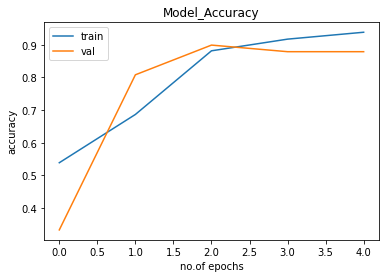

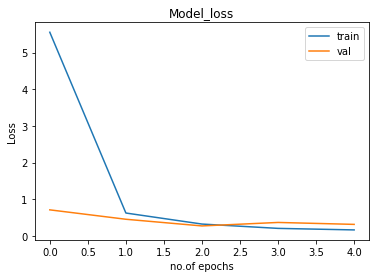

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('no.of epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.title('Model_Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('no.of epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.title('Model_loss')
plt.show()

In [15]:
from tensorflow.keras.preprocessing import image

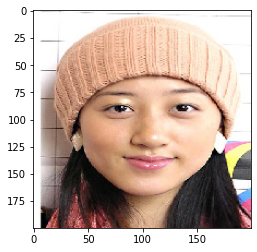

In [32]:
img = image.load_img('/content/44.jpg',target_size=(img_width,img_hight,3))
plt.imshow(img)

def Evaluation(img): 
  img = image.img_to_array(img)
  img = img/255.0
  img = img.reshape(1,img_width,img_hight,3)
  pred = model.predict_classes(img)
  if pred ==1:
    print('input imge is without Mask')
  else:
    print('input imge is With Mask')

input imge is With Mask


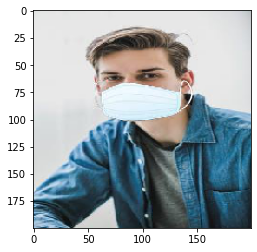

In [33]:
img = image.load_img('/content/sample_file.jpg',target_size=(img_width,img_hight,3))
plt.imshow(img)
Evaluation(img)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
input imge is without Mask


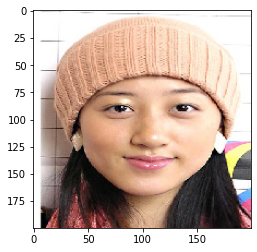

In [20]:
img = image.load_img('/content/44.jpg',target_size=(img_width,img_hight,3))
plt.imshow(img)
Evaluation(img)

input imge is With Mask


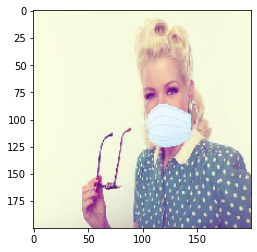

In [34]:
img = image.load_img('/content/6-with-mask.jpg',target_size=(img_width,img_hight,3))
plt.imshow(img)
Evaluation(img)

input imge is without Mask


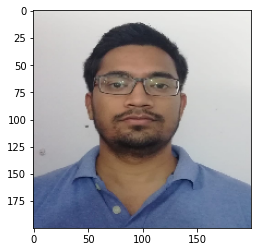

In [35]:
img = image.load_img('/content/Photo.jpeg',target_size=(img_width,img_hight,3))
plt.imshow(img)
Evaluation(img)